In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
data= pd.read_csv("Dataset.csv")

# Exercise-1

In [110]:
x=data['X']
y=data['Y']
z=data['Z']

In [111]:
def PMF(RV): 
    rvFreq=np.linspace(min(RV),max(RV),12) # This contains the bounds according to which the frequencies are taken
    arrayRvFreq=[] # Array which stores the frequencies of the distribution of the random variable
    for i in range(1,len(rvFreq)):
        rv=[]
        rv=data[(RV>=rvFreq[i-1]) & (RV<=rvFreq[i])]
        arrayRvFreq.append(len(rv))
    return (arrayRvFreq,rvFreq)



In [112]:
print(PMF(x),PMF(y),PMF(z))

([4, 3, 15, 61, 98, 105, 98, 70, 30, 13, 3], array([ 7.83215992,  8.21881721,  8.6054745 ,  8.9921318 ,  9.37878909,
        9.76544638, 10.15210368, 10.53876097, 10.92541826, 11.31207555,
       11.69873285, 12.08539014])) ([2, 17, 50, 77, 118, 93, 86, 41, 7, 8, 1], array([-2.37733544, -1.89226012, -1.40718481, -0.92210949, -0.43703417,
        0.04804115,  0.53311647,  1.01819179,  1.50326711,  1.98834243,
        2.47341775,  2.95849307])) ([11, 17, 53, 76, 96, 101, 63, 39, 22, 16, 6], array([-2.55578308, -2.05450153, -1.55321998, -1.05193843, -0.55065688,
       -0.04937533,  0.45190622,  0.95318777,  1.45446932,  1.95575087,
        2.45703242,  2.95831397]))


In [124]:
def jointPDF(rv1,rv2,rv3):
    rvf1,rvFreq1=PMF(x)
    rvf2,rvFreq2=PMF(y)
    rvf3,rvFreq3=PMF(z)
    i=1
    m=0
    n=0
    while i<len(rvFreq1)-1:
        if(rv1>=rvFreq1[i-1] and rv1<=rvFreq1[i]):
            j=1
            while j<len(rvFreq2)-1:
                if(rv2>=rvFreq2[j-1] and rv2<=rvFreq2[j]):
                    k=1
                    while k<len(rvFreq3)-1:
                        if(rv3>=rvFreq3[k-1] and rv3<=rvFreq3[k]):
                            n=k
                            break
                        k+=1
                    m=j
                    break
                j+=1
            break
        i+=1
    px=data[(data['X']>=rvFreq1[i-1]) & (data['X']<=rvFreq1[i])]
    pxy=px[(px['Y']>=rvFreq2[m-1]) & (px['Y']<=rvFreq2[m])]
    pxyz=pxy[(pxy['Z']>=rvFreq3[n-1]) & (pxy['Z']<=rvFreq3[n])]
    fxyz=len(pxyz)/len(data)
    return fxyz
    

Text(0.5, 0.92, 'Joint PDF')

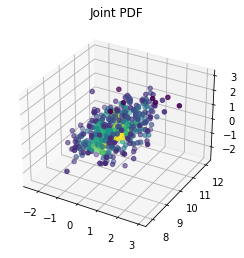

In [125]:
fig = plt.figure()
ax = plt.axes(projection='3d')

zdata = z
xdata = y
ydata = x
pdf=[]

for i in range(len(data)):
    pdf.append(jointPDF(x[i],y[i],z[i]))

ax.scatter3D(xdata, ydata, zdata, c=pdf);
ax.set_title("Joint PDF")

In [126]:
def marginal(rv,RV):
    rvFreq=PMF(RV)
    i=1
    while i<len(rvFreq)-1:
        if(rv>=rvFreq[i-1] and rv<=rvFreq[i]):
            break
        i+=1
    p=RV[i]/len(RV)
    return p

In [127]:
def marginalxy(rv1,rv2):
    rvf1,rvFreq1=PMF(x)
    rvf2,rvFreq2=PMF(y)
    i=1
    k=0
    while i<len(rvFreq1)-1:
        if(rv1>=rvFreq1[i-1] and rv1<=rvFreq1[i]):
            j=1
            while j<len(rvFreq2)-1:
                if(rv2>=rvFreq2[j-1] and rv2<=rvFreq2[j]):
                    k=j
                    break
                j+=1
            break
        i+=1
    px=data[(data['X']>=rvFreq1[i-1]) & (data['X']<=rvFreq1[i])]
    pxy=px[(px['Y']>=rvFreq2[k-1]) & (px['Y']<=rvFreq2[k])]
    fxy=len(pxy)/len(x)
    return fxy

In [128]:
def marginalyz(rv1,rv2):
    rvf1,rvFreq1=PMF(y)
    rvf2,rvFreq2=PMF(z)
    i=1
    k=0
    while i<len(rvFreq1)-1:
        if(rv1>=rvFreq1[i-1] and rv1<=rvFreq1[i]):
            j=1
            while j<len(rvFreq2)-1:
                if(rv2>=rvFreq2[j-1] and rv2<=rvFreq2[j]):
                    k=j
                    break
                j+=1
            break
        i+=1
    py=data[(data['Y']>=rvFreq1[i-1]) & (data['Y']<=rvFreq1[i])]
    pyz=py[(py['Z']>=rvFreq2[k-1]) & (py['Z']<=rvFreq2[k])]
    fyz=len(pyz)/len(y)
    return fyz

In [129]:
def marginalzx(rv1,rv2):
    rvf1,rvFreq1=PMF(z)
    rvf2,rvFreq2=PMF(x)
    i=1
    k=0
    while i<len(rvFreq1)-1:
        if(rv1>=rvFreq1[i-1] and rv1<=rvFreq1[i]):
            j=1
            while j<len(rvFreq2)-1:
                if(rv2>=rvFreq2[j-1] and rv2<=rvFreq2[j]):
                    k=j
                    break
                j+=1
            break
        i+=1
    pz=data[(data['Z']>=rvFreq1[i-1]) & (data['Z']<=rvFreq1[i])]
    pzx=pz[(pz['X']>=rvFreq2[k-1]) & (pz['X']<=rvFreq2[k])]
    fzx=len(pzx)/len(z)
    return fzx

Text(0.5, 1.0, 'Fz')

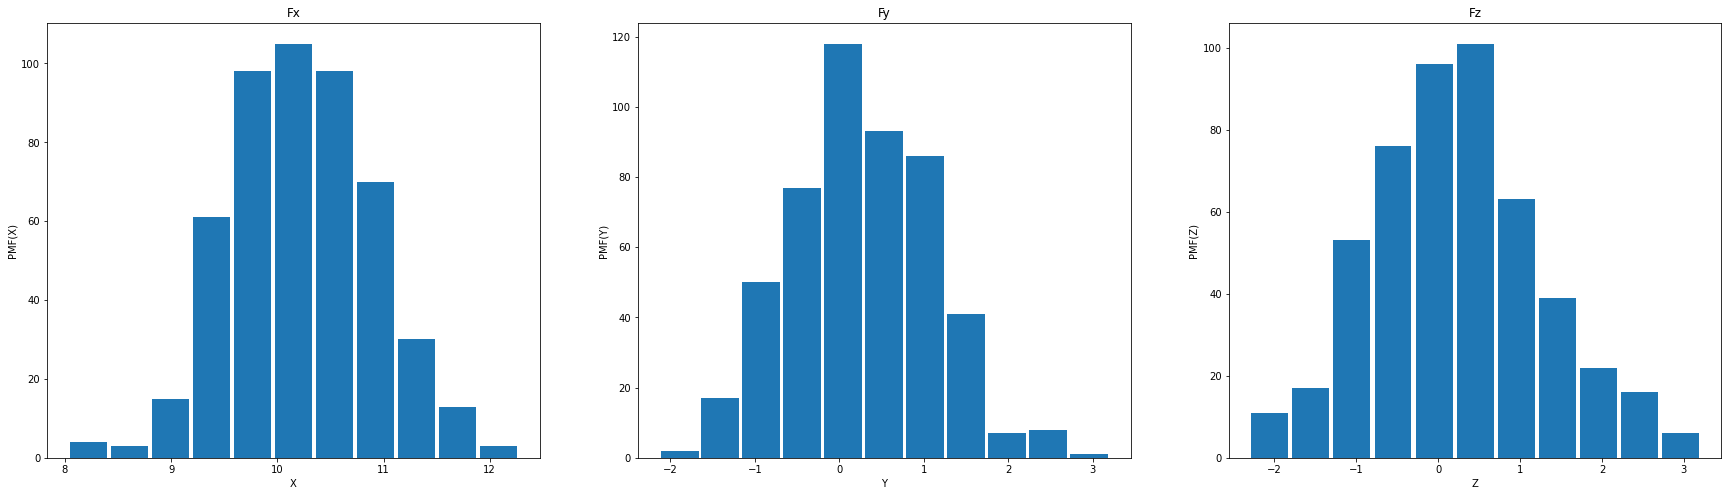

In [130]:
xF,xFreq=PMF(x)
yF,yFreq=PMF(y)
zF,zFreq=PMF(z)

fig,ax=plt.subplots(1,3,figsize=(30,8))

ax[0].bar(xFreq[1:],xF,width=0.35)
ax[0].set_xlabel("X")
ax[0].set_ylabel("PMF(X)")
ax[0].set_title("Fx")

ax[1].bar(yFreq[1:],yF,width=0.45)
ax[1].set_xlabel("Y")
ax[1].set_ylabel("PMF(Y)")
ax[1].set_title("Fy")

ax[2].bar(zFreq[1:],zF,width=0.45)
ax[2].set_xlabel("Z")
ax[2].set_ylabel("PMF(Z)")
ax[2].set_title("Fz")

Text(0.5, 0.92, 'Fzx')

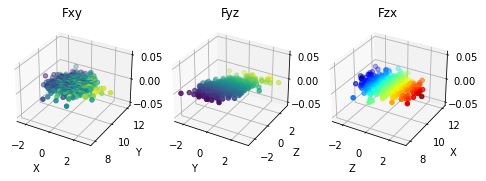

In [131]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1,3,1,projection='3d')
zData =[]
for i in range(len(data)):
    zData.append(marginalxy(x[i],y[i]))
xData = x
yData = y
ax.scatter3D(xdata, ydata, c=zdata);
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Fxy")

ax = fig.add_subplot(1,3,2,projection='3d')
zData =[]
for i in range(len(data)):
    zData.append(marginalyz(y[i],z[i]))
xdata = y
ydata = z
ax.scatter3D(xdata, ydata, c=zdata);
ax.set_xlabel("Y")
ax.set_ylabel("Z")
ax.set_title("Fyz")

ax = fig.add_subplot(1,3,3,projection='3d')
zData =[]
for i in range(len(data)):
    zData.append(marginalzx(z[i],x[i]))
xdata = z
ydata = x
ax.scatter3D(xdata, ydata, c=zdata, cmap='jet');
ax.set_xlabel("Z")
ax.set_ylabel("X")
ax.set_title("Fzx")

# Exercise 2

In [135]:
print("E(X)=",x.mean())

E(X)= 10.032763685884007


In [136]:
print("E(Y)=",y.mean())

E(Y)= 0.017526394005610003


In [137]:
print("E(Z)=",z.mean())

E(Z)= -0.028856274143856254


# Exercise 3

Positive correlation

In [138]:
p=np.random.random(1000)
q=np.array([x**2 for x in p])
covariance=np.cov(p,q)
sigmap=np.std(p)
sigmaq=np.std(q)
print(covariance[1][0]/(sigmap*sigmaq))

0.9704991271509449


Negative correlation

In [139]:
p=np.random.random(1000)
q=np.array([1/x for x in p])
covariance=np.cov(p,q)
sigmap=np.std(p)
sigmaq=np.std(q)
print(covariance[1][0]/(sigmap*sigmaq))

-0.16985823312703419


Uncorrelated and Independent

In [140]:
p=np.linspace(1,10,1000)
q=np.random.randint(1,1000,size=1000)
covariance=np.cov(p,q)
sigmap=np.std(p)
sigmaq=np.std(q)
print(covariance[1][0]/(sigmap*sigmaq))

-0.008052647306378198


Uncorrelated and non independent

In [141]:
p=np.linspace(1,10,100)
q1=np.array([-1*x**2 for x in p[:50]])
q2=np.array([1/(x**2) for x in p[50:]])
q=np.hstack((q1,q2))
covariance=np.cov(p,q)
sigmap=np.std(p)
sigmaq=np.std(q)
print(covariance[1][0]/(sigmap*sigmaq))

0.36938995589969775
